# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## Odalys Barrionuevo
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### <span style="color:green"> Commento: </span>

<span style="color:green"> Nella seguente esercitazione è stato parallelizzato il codice dell'algoritmo genetico dell'esercitazione 9 per risolvere il problema del commesso viaggiatore. La ricerca della distanza minima è stata affrontata facendo 8 ricerche parallele indipendenti. Ogni $N_{migr} = 2$ tutti e 8 i nodi si scambiano casulamente i loro 350 migliori individui per aumentare la diversità su ogni popolazione e ogni nodo usa un generatore di numeri casuali diverso. </span>

<span style="color:green">Per lo scambio di informazioni tra nodi sono stati sfruttati due metodi della libreria MPI: MPI_Gather e MPI_Bcast. MPI_Gather è stato usato per mandare informazioni da tutti i nodi al nodo 0, per esempio per condividere il minimo di ogni popolazione e per raggruppare i migliori individui di ogni popolazione per lo scambio. MPI_Bcast è stato usato per mandare informazioni dal nodo 0 a tutti gli altri nodi, per esempio per condividere il vettore di città (che deve essere lo stesso per tutti in modo tale che tutti i nodi lavorino sullo stesso problema) o per ridistribuire gli individui migliori (soggetti a mescolamento) alla popolazione di ogni nodo. </span>

<span style="color:green">I parametri usati per la parallelizzazione sono: $popolazione = 1000$, $città = 34$, $generazioni = 500$, $probabilità\ di\ crossover = 0.9$, $probabilità\ di\ mutazione = 0.1$. La scelta degli individui è stata affronata scegliendo casualmente due indici della popolazione (che corrispondono a due individui diversi) seguendo la seguente funzione: $index = int(size_{popolazione} \times r^p)$ con $r$ un numero casuale scelto tra [0,1) e $p = 0,3.$</span>

<span style="color:green">Per testarne il funzionamento vengono riportati sotto i grafici (sia del problema della circonferenza che del quadrato) della distanza del percorso migliore (tra tutti i nodi) e della media sulla migliore metà popolazione del nodo 0. Inoltre viene riportato un confronto tra delle distanze minime MPI e non MPI per generazione. Si puo notare come la parallelizzazione del codice (con lo scambio di informazioni) renda più efficente la ricerca del percorso minimo. </span>

### <span style="color:green"> Circonferenza di raggio 1: </span>

<span style="color:green"> In questo caso i minimi della distanza percorsa dell'esercitazione 9 e quello dell'algoritmo genetico parallelizzato, coincidono ($L_{min} = 6.24306$). Però si può notare dalla seconda rappresentazione che con la parallelizzazione il minimo viene raggiunto prima. </span>

Distanza minima percorsa:
6.24306


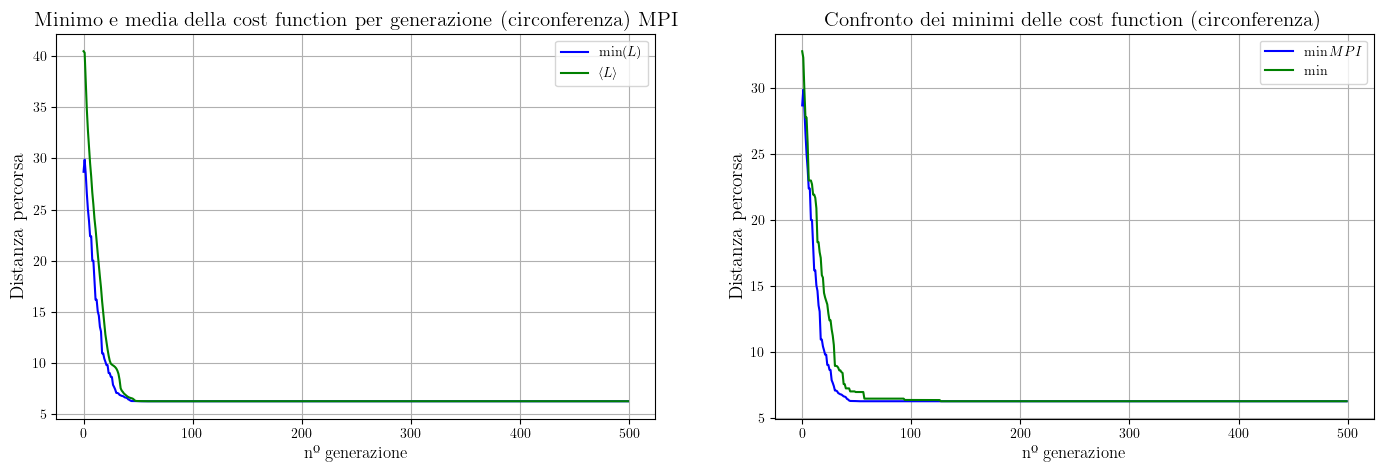

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

costfunction_min = np.loadtxt("min_cost_circonferenza_MPI.txt", usecols = (1), unpack = 'true')
costfunction_mean = np.loadtxt("mean_cost_circonferenza_MPI.txt", usecols = (1), unpack = 'true')
costfunction_min_old = np.loadtxt("min_cost_circonferenza.txt", usecols = (1), unpack = 'true')

fig, axes = plt.subplots(1, 2, figsize=(17, 5))

axes[0].plot(costfunction_min, color = 'blue', label = '$\min(L)$')
axes[0].plot(costfunction_mean, color = 'green', label = r'$ \langle {L} \rangle  $')
axes[0].set_title("Minimo e media della cost function per generazione (circonferenza) MPI",fontsize = 15)
axes[0].set_xlabel('nº generazione',fontsize = 12)
axes[0].set_ylabel("Distanza percorsa",fontsize = 14)
axes[0].grid()
axes[0].legend()

axes[1].plot(costfunction_min, color = 'blue', label = '$\min MPI$')
axes[1].plot(costfunction_min_old, color = 'green', label = '$\min$')
axes[1].set_title("Confronto dei minimi delle cost function (circonferenza)",fontsize = 15)
axes[1].set_xlabel('nº generazione',fontsize = 12)
axes[1].set_ylabel("Distanza percorsa",fontsize = 14)
axes[1].grid()
axes[1].legend()

print("Distanza minima percorsa:")
print(costfunction_min[499])

plt.show()

### <span style="color:green"> Quadrato di raggio 2:

<span style="color:green"> Ricordiamo che la distanza minima trovata per il percorso interno al quadrato di raggio 2, nell'esercitazione 9, era di $L_{min} = 10.1805$ mentre con la parallelizzazione dell'algoritmo genetico otteniamo $L_{min} = 10.0349.$ Anqui qui si può notare che il minimo viene raggiunto prima dall'algoritmo parallelizzato.</span>

Distanza minima percorsa:
10.0349


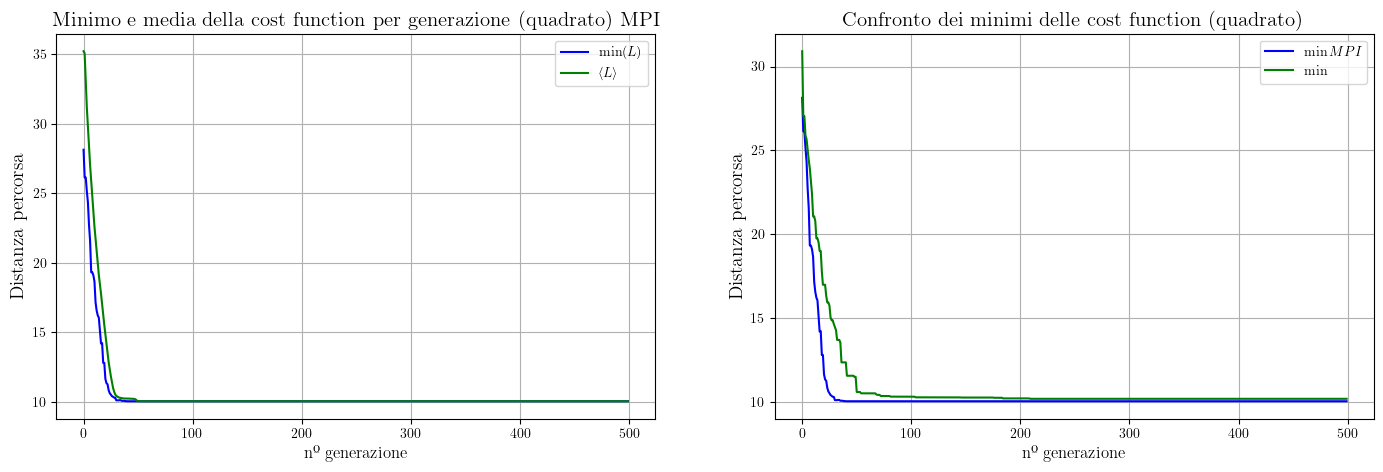

In [42]:
costfunction_min = np.loadtxt("min_cost_quadrato_MPI.txt", usecols = (1), unpack = 'true')
costfunction_mean = np.loadtxt("mean_cost_quadrato_MPI.txt", usecols = (1), unpack = 'true')
costfunction_min_old = np.loadtxt("min_cost_quadrato.txt", usecols = (1), unpack = 'true')

fig, axes = plt.subplots(1, 2, figsize=(17, 5))

axes[0].plot(costfunction_min, color = 'blue', label = '$\min(L)$')
axes[0].plot(costfunction_mean, color = 'green', label = r'$ \langle {L} \rangle  $')
axes[0].set_title("Minimo e media della cost function per generazione (quadrato) MPI",fontsize = 15)
axes[0].set_xlabel('nº generazione',fontsize = 12)
axes[0].set_ylabel("Distanza percorsa",fontsize = 14)
axes[0].grid()
axes[0].legend()

axes[1].plot(costfunction_min, color = 'blue', label = '$\min MPI$')
axes[1].plot(costfunction_min_old, color = 'green', label = '$\min$')
axes[1].set_title("Confronto dei minimi delle cost function (quadrato)",fontsize = 15)
axes[1].set_xlabel('nº generazione',fontsize = 12)
axes[1].set_ylabel("Distanza percorsa",fontsize = 14)
axes[1].grid()
axes[1].legend()

print("Distanza minima percorsa:")
print(costfunction_min[499])

plt.show()

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

### <span style="color:green"> Commento: </span>

<span style="color:green"> Nel seguente esercizio viene usato il codice, parallelizzato nel punto 10.1, per risolvere il problema del commesso viaggiatore usando i capoluoghi di provincia italiani. Il problema verrà affrontato prima con i nodi non comunicanti e poi con i nodi comunicanti. </span>

### <span style="color:green"> Nodi non comunicanti: </span>

<span style="color:green">I parametri usati sono: $popolazione = 1000$, $città = 110$, $numero\ città\ scambiate = 350$, $generazioni = 800$, $probabilità\ di\ crossover = 0.95$, $probabilità\ di\ mutazione = 0.1$. Per la scelta degli individui viene usata sempre $index = int(size_{popolazione} \times r^p)$ ma per ogni nodo $p$ ha un valore diverso:</span>

<span style="color:green"> Nodo 0 ----> $p = 0.05$</span>

<span style="color:green"> Nodo 1 ----> $p = 0.1$</span>

<span style="color:green"> Nodo 2 ----> $p = 0.15$</span>

<span style="color:green"> Nodo 3 ----> $p = 0.2$</span>

<span style="color:green"> Nodo 4 ----> $p = 0.25$</span>

<span style="color:green"> Nodo 5 ----> $p = 0.3$</span>

<span style="color:green"> Nodo 6 ----> $p = 0.35$</span>

<span style="color:green"> Nodo 7 ----> $p = 0.4$</span>

<span style="color:green"> Sotto viene riportato il percorso fatto dal commesso viaggiatore. Come si può notare dai molteplici incroci della traiettoria, il codice, senza la comunicazione tra nodi (per lo scambio casuale di individui) non è molto efficente. Vengono mostrati anche i grafici della distanza minima e media per ogni generazione e si trova che $L_{min} = 80.703$.</span>

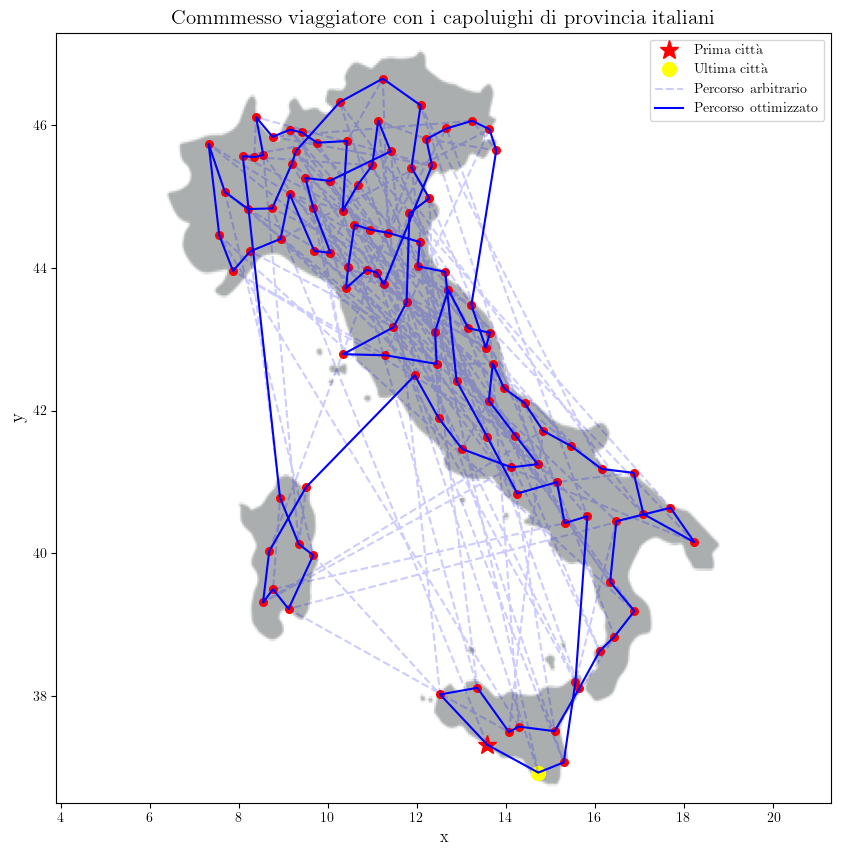

In [284]:
import matplotlib.pyplot as plt
import numpy as np
import math

img = plt.imread("Italia.png")
point_x, point_y = np.loadtxt("cap_prov_ita.dat", usecols = (0, 1), unpack = 'true')
right_x, right_y = np.loadtxt("Soluzione_Italia_MPI_NC.txt", usecols = (0, 1), unpack = 'true')

plt.figure(figsize = (10, 10))

plt.imshow(img, extent=[3.9, 21.3, 36.5, 47.3], aspect='auto')
plt.scatter(point_x, point_y, s = 30, color = 'red')
plt.plot(point_x[0], point_y[0],'*', markersize = 14, label = 'Prima città', color = 'red')
plt.plot(right_x[109], right_y[109],'o', markersize = 10, label = 'Ultima città', color = 'yellow')
plt.plot(point_x, point_y, label = "Percorso arbitrario", color = 'blue', linestyle = '--', alpha =0.2)
plt.plot(right_x, right_y, label = "Percorso ottimizzato", color = 'blue', alpha = 1)
plt.title("Commmesso viaggiatore con i capoluighi di provincia italiani",fontsize = 15)
plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 14)
plt.legend()
plt.show()

Distanza minima percorsa:
80.703


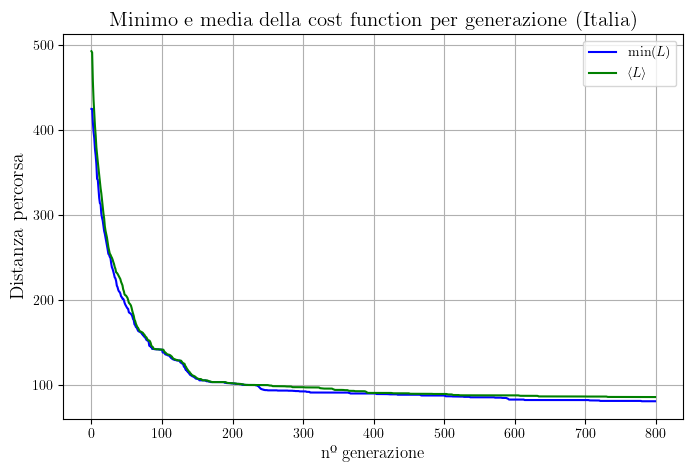

In [289]:
costfunction_min = np.loadtxt("min_cost_Italia_MPI_NC.txt", usecols = (1), unpack = 'true')
costfunction_mean = np.loadtxt("mean_cost_Italia_MPI_NC.txt", usecols = (1), unpack = 'true')
plt.figure(figsize = (8, 5))

plt.plot(costfunction_min, color = 'blue', label = '$\min(L)$')
plt.plot(costfunction_mean, color = 'green', label = r'$ \langle {L} \rangle  $')
plt.title("Minimo e media della cost function per generazione (Italia)",fontsize = 15)
plt.xlabel('nº generazione',fontsize = 12)
plt.ylabel("Distanza percorsa",fontsize = 14)
print("Distanza minima percorsa:")
print(costfunction_min[799])
plt.grid()
plt.legend()
plt.show()

### <span style="color:green"> Nodi comunicanti: </span>

<span style="color:green">I parametri usati sono: $N_{migr} = 2$, $numero\ città\ scambiate = 350$, $popolazione = 1000$, $città = 110$, $generazioni = 800$, $probabilità\ di\ crossover = 0.95$, $probabilità\ di\ mutazione = 0.1$. Per la scelta degli individui: come nel caso dei nodi non comunicanti.</span>

<span style="color:green"> Viene anche qui riportato il percorso fatto dal commesso viaggiatore. Il fatto che presenti ancora un incrocio indica che il codice potrebbe essere ulteriormente migliorato però si può notare comunque che con la comunicazione tra nodi (per lo scambio casuale di individui) il codice è molto più efficente. Sotto vengono mostrati i grafici della distanza minima e media per ogni generazione e si trova che $L_{min} = 68.0693$ ben 12 unità in meno rispetto al caso di nodi non comunicanti.</span>

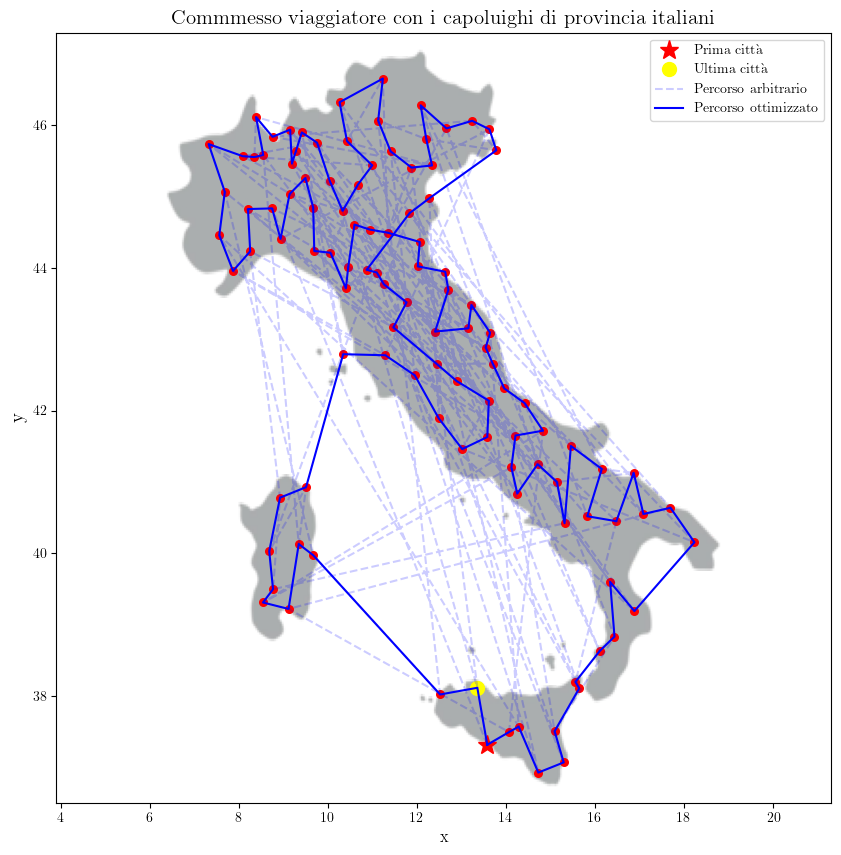

In [280]:
import matplotlib.pyplot as plt
import numpy as np
import math

img = plt.imread("Italia.png")
point_x, point_y = np.loadtxt("cap_prov_ita.dat", usecols = (0, 1), unpack = 'true')
right_x, right_y = np.loadtxt("Soluzione_Italia_MPI.txt", usecols = (0, 1), unpack = 'true')

plt.figure(figsize = (10, 10))

plt.imshow(img, extent=[3.9, 21.3, 36.5, 47.3], aspect='auto')
plt.scatter(point_x, point_y, s = 30, color = 'red')
plt.plot(point_x[0], point_y[0],'*', markersize = 14, label = 'Prima città', color = 'red')
plt.plot(right_x[109], right_y[109],'o', markersize = 10, label = 'Ultima città', color = 'yellow')
plt.plot(point_x, point_y, label = "Percorso arbitrario", color = 'blue', linestyle = '--', alpha =0.2)
plt.plot(right_x, right_y, label = "Percorso ottimizzato", color = 'blue', alpha = 1)
plt.title("Commmesso viaggiatore con i capoluighi di provincia italiani",fontsize = 15)
plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 14)
plt.legend()
plt.show()

Distanza minima percorsa:
68.0693


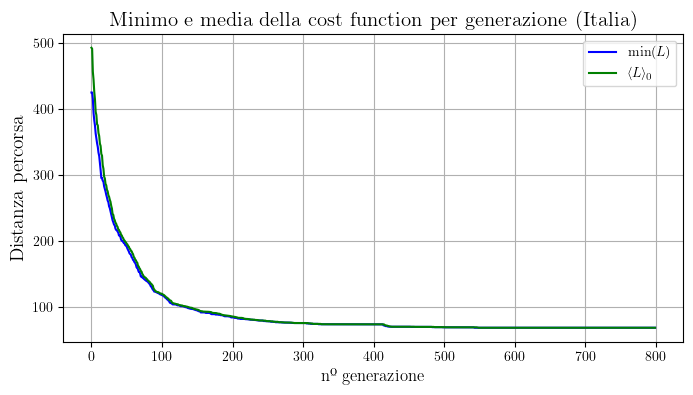

In [276]:
costfunction_min = np.loadtxt("min_cost_Italia_MPI.txt", usecols = (1), unpack = 'true')
costfunction_mean = np.loadtxt("mean_cost_Italia_MPI.txt", usecols = (1), unpack = 'true')
plt.figure(figsize = (8, 4))

plt.plot(costfunction_min, color = 'blue', label = '$\min(L)$')
plt.plot(costfunction_mean, color = 'green', label = r'$ \langle {L} \rangle _0  $')
plt.title("Minimo e media della cost function per generazione (Italia)",fontsize = 15)
plt.xlabel('nº generazione',fontsize = 12)
plt.ylabel("Distanza percorsa",fontsize = 14)
print("Distanza minima percorsa:")
print(costfunction_min[799])
plt.grid()
plt.legend()
plt.show()

### <span style="color:green"> Confronto: </span>

<span style="color:green"> Viene riportato sotto il confronto delle distanze minime per generazione tra nodi comunicanti e non comunicanti. Vengono stampate anche le due distanze minime raggiunte. Come si può vedere, il codice, con la comunicazione tra i nodi, è più efficente in quanto riesce ad ottimizzare meglio il percorso riuscendo a trovare una distanza totale ancora più piccola. </span>

Distanza minima percorsa non comunicante:
80.703
Distanza minima percorsa comunicante:
68.0693


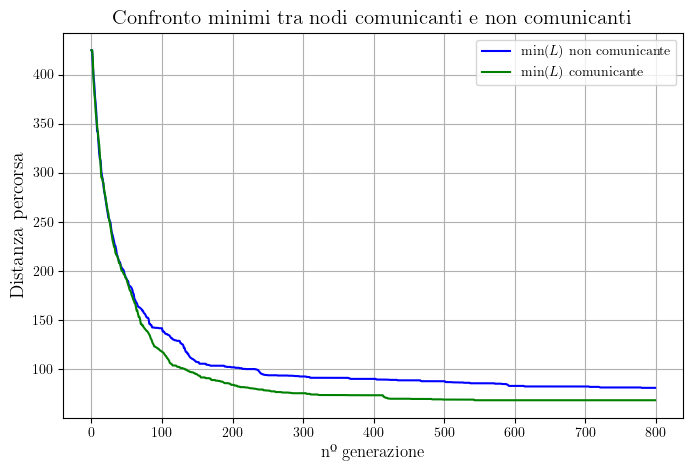

In [300]:
costfunction_min_NC = np.loadtxt("min_cost_Italia_MPI_NC.txt", usecols = (1), unpack = 'true')
costfunction_min = np.loadtxt("min_cost_Italia_MPI.txt", usecols = (1), unpack = 'true')
plt.figure(figsize = (8, 5))

plt.plot(costfunction_min_NC, color = 'blue', label = '$\min(L)$ non comunicante')
plt.plot(costfunction_min, color = 'green', label = r'$\min(L)$ comunicante')
plt.title("Confronto minimi tra nodi comunicanti e non comunicanti",fontsize = 15)
plt.xlabel('nº generazione',fontsize = 12)
plt.ylabel("Distanza percorsa",fontsize = 14)
print("Distanza minima percorsa non comunicante:")
print(costfunction_min_NC[799])
print("Distanza minima percorsa comunicante:")
print(costfunction_min[799])
plt.grid()
plt.legend()
plt.show()